# Sentiment Classification


In [1]:
# Let's import some of the packages to perform classification task

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

## Loading the dataset

In [2]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size
INDEX_FROM=3  # word index offset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, index_from=INDEX_FROM) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
# Concatinating both train and test data to get into the the dataset
# It is to be noted that, both train and test set shape is same.

features = np.concatenate((x_train, x_test), axis=0)
target = np.concatenate((y_train, y_test), axis=0)

print("Types of catagories:", np.unique(target))
print("Number of unique words:", len(np.unique(features)))

Types of catagories: [0 1]
Number of unique words: 49579


- The dataset has 49579 words in total and has two class target value. 
- 0 stands for negative review and 1 stands for positive review.

In [4]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [5]:
import numpy as np
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
print(x_train.shape, y_train.shape)

(25000, 300) (25000,)


In [7]:
print(x_test.shape, y_test.shape)

(25000, 300) (25000,)


- Here we've not considered any specific split ratio, and continued with the given test and train data.

In [8]:
import pandas as pd
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,21,134,476,26,480,5,144,30,5535,18,51,36,28,224,92,25,104,4,226,65,16,38,1334,88,12,16,283,5,16,4472,113,103,32,15,16,5345,19,178,32
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,152,491,18,2,32,7464,1212,14,9,6,371,78,22,625,64,1382,9,8,168,145,23,4,1690,15,16,4,1355,5,28,6,52,154,462,33,89,78,285,16,145,95
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,22,12,272,40,57,31,11,4,22,47,6,2307,51,9,170,23,595,116,595,1352,13,191,79,638,89,2,14,9,8,106,607,624,35,534,6,227,7,129,113
3,12,47,6,2683,936,5,6307,2,19,49,7,4,1885,2,1118,25,80,126,842,10,10,2,2,4726,27,4494,11,1550,3633,159,27,341,29,2733,19,4185,173,7,90,2,...,14,31,9,242,955,48,25,279,2,23,12,1685,195,25,238,60,796,2,4,671,7,2804,5,4,559,154,888,7,726,50,26,49,7008,15,566,30,579,21,64,2574
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,233,334,207,126,224,12,562,298,2167,1272,7,2601,5,516,988,43,8,79,120,15,595,13,784,25,3171,18,165,170,143,19,14,5,7224,6,226,251,7,61,113


In [9]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,92,124,89,488,7944,100,28,1668,14,31,23,27,7479,29,220,468,8,124,14,286,170,8,157,46,5,27,239,16,179,2,38,32,25,7944,451,202,14,6,717
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,529,48,25,181,8,67,35,1732,22,49,238,60,135,1162,14,9,290,4,58,10,10,472,45,55,878,8,169,11,374,5687,25,203,28,8,818,12,125,4,3077
2,1239,5189,137,2,18,27,173,9,2399,17,6,2,428,2,232,11,4,8014,37,272,40,2708,247,30,656,6,2,54,2,3292,98,6,2840,40,558,37,6093,98,4,2,...,2321,42,1898,11,4,3814,42,101,704,7,101,999,15,1625,94,2926,180,5,9,9101,34,2,45,6,1429,22,60,6,1220,31,11,94,6408,96,21,94,749,9,57,975
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,149,102,15,26,814,38,465,1627,31,70,983,67,51,9,112,814,17,35,311,75,26,2,574,19,4,1729,23,4,268,38,95,138,4,609,191,75,28,314,1772
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,401,14,1361,879,13,28,8,401,61,1642,2925,44,1373,21,591,353,14,500,4092,30,290,12,10,10,65,790,790,206,158,300,45,15,52,2,158,692,2,158,856,158


In [10]:
pd.DataFrame(y_train).head()

,0
0,1
1,0
2,0
3,1
4,0


In [11]:
pd.DataFrame(y_test).head()

,0
0,0
1,1
2,1
3,0
4,1


In [12]:
# Concatinating both train and test data to get into the the dataset
# It is to be noted that, both train and test set shape is same.

features = np.concatenate((x_train, x_test), axis=0)
target = np.concatenate((y_train, y_test), axis=0)

print("Types of catagories:", np.unique(target))
print("Number of unique words after padding:", len(np.unique(features)))

Types of catagories: [0 1]
Number of unique words after padding: 9999


- After pading and considering the 10000 word limit, the number of of unique words reduced to 9999 

In [13]:
# Let's check for any random training example

print("Label:", target[35])

Label: 1
print(features[35])

Label: 0
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1 1255 1223 5547
 1265 2390 1747    8    4  268  103   27  532 3670 2016   14   58   45
    6   22  198  256   18    2  137   23    6 8116 1189 5547  659    4
  648    7    6 1976  936   33    4 1324    7    4 2019   41 2194   17
   25  238  535    2   11    2 5547 1241   23    4  420  103  112 2633
   34  132 2527    2    2 5547  659  309 1241   33 2960   17   29   47
    8 3928   49 3493 2110   37  471    4 8915   23   90    5   29    9
  309  258    8   30    4  293 1781   29  215  150  140   23    4  521
    5  440    8 3330    4  420  584    4    2 2390  497  254    8 2225
  178    4  835  640    5   97  178  264   29    9    6   52 1255  4

- the zeros shown in the above output section is due to pading operation to meet the maximum length of words to be 300.

In [14]:
# Let's check for any random training example

print("Label:", target[40])

Label: 0
print(features[40])

Label: 1
[  15 1194    4   22    9  441   18    4   91  173   19  660 7141    4
 3049  613    4 5789 1941   17   36  173    5    6  176   15  571  103
   15    4  107 1529  531  238   30  717    2    2  103   59 1085    2
    5 4759    2   21   50   71  407  111   85  211   54   13 1498  141
   17  338    2  269    8    2   19   85 3321    4 5789  131   28   68
 1382    5 2849 3871   63  540   82 1525 1671    4   20   18    4   91
  173   17  127    4  114    6  606   21 1774   31   18   32 2088   50
   26   49 6118  388  141   17    4 5582 5412  720    5    2    2  239
   17 4759    9    2   21 1082    7  134  712   26   99 2681    5   26
  230   39  195    8 2457    4  436  585   10   10   13   62  135    4
 5582   20    4   22   15  645    4 3135   11 5515    9    4  118    7
    4  204 2355    5   15  186    8   30    4   91 1063  652   14  840
   22    9  242    4 4343    7    4  289   21   32    7   98   26   52
 1025 5789   39  834    4  840    7    4 2253  108   11    4 3135   

- In this feature, we have 300 words preesent in it, so pading is not required for it.

In [15]:
# Getting all the unique words and thier frequencies in the whole dataset
key_value = imdb.get_word_index()

# Reversing the key, value pairs
reverse = dict()
for (key, value) in key_value.items():
    reverse.update([(value, key)])

1646592/1641221 [==============================] - 0s 0us/step


In [16]:
reverse

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

- Above output section shows the keys and corrosponding values.

- Let's get some reviews to know .

In [17]:
# Let's see the reviews
import keras
review = []

for i in features[1325]:
  review.append(reverse.get(i - 3, "#"))
print(" ".join(review))

getting together some great comedy writers and doing a quality sitcom ' offers another and is fired on the spot # you know good writers cost lots of money ' the big chief # # why we invented reality tv ' br br # could do yet another crime drama ' suggests a man in a bland suit # listening ' the boss replies suddenly interested # like # so let's do another copy of that ' # adds br br # there are already far too many # # out there what can we do to make # stand out ' a naive junior # and is # instantly # out if we do that people may be confused let's give them more of what they already like ' the big chief screams br br # just add more violence and make it really grisly we are fox after all ' another suit suggests to a # # of # you're getting # from the big chief # could make them the # crimes unit ' he goes on to add clearly on a roll br br # # he's got it ' the big chief laughs # the victims could be beautiful and vulnerable women who wear very little on screen ' # that would certainly

- Another way of reading reviews is shown below.
- The paded words are overwriten by PAD and START shows the begining of a sentence

In [18]:
from keras import utils as np_utils


word_to_id = keras.datasets.imdb.get_word_index()

word_to_id = {k:(v+3) for k,v in word_to_id.items()}

word_to_id["<PAD>"] = 0

word_to_id["<START>"] = 1

word_to_id["<UNK>"] = 2

word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

print(' '.join(id_to_word[id] for id in x_train[3250] ))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> my personal opinion is that this movie had no real story line to the first john carpenter's vampires but i don't care i loved it jon bon <UNK> derek was great in this movie he really mad me beli

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
pip install gensim

In [22]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors #gensim contains word2ec models and processing tools

In [23]:
glove_file = ("/content/drive/MyDrive/AIML/NLP Project/glove.6B.100d.txt.gz") # GloVe file 6B dataset with 100d

In [24]:
temp_file = ("/content/drive/MyDrive/AIML/NLP Project/glove.6B.50d.txt.gz") # word2vec file 6B dataset with 100d

In [25]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, temp_file) # Converting the Glove file into a Word2vec file
model = KeyedVectors.load_word2vec_format(temp_file)

In [26]:
# Checking out how the embeddings look like

wordEmbed = model['cat']
print(wordEmbed.shape)
print(wordEmbed)

(100,)
[ 0.23088    0.28283    0.6318    -0.59411   -0.58599    0.63255
  0.24402   -0.14108    0.060815  -0.7898    -0.29102    0.14287
  0.72274    0.20428    0.1407     0.98757    0.52533    0.097456
  0.8822     0.51221    0.40204    0.21169   -0.013109  -0.71616
  0.55387    1.1452    -0.88044   -0.50216   -0.22814    0.023885
  0.1072     0.083739   0.55015    0.58479    0.75816    0.45706
 -0.28001    0.25225    0.68965   -0.60972    0.19578    0.044209
 -0.31136   -0.68826   -0.22721    0.46185   -0.77162    0.10208
  0.55636    0.067417  -0.57207    0.23735    0.4717     0.82765
 -0.29263   -1.3422    -0.099277   0.28139    0.41604    0.10583
  0.62203    0.89496   -0.23446    0.51349    0.99379    1.1846
 -0.16364    0.20653    0.73854    0.24059   -0.96473    0.13481
 -0.0072484  0.33016   -0.12365    0.27191   -0.40951    0.021909
 -0.6069     0.40755    0.19566   -0.41802    0.18636   -0.032652
 -0.78571   -0.13847    0.044007  -0.084423   0.04911    0.24104
  0.45273   -0

In [27]:

wordEmbed = model['hurray']
print(wordEmbed.shape)
print(wordEmbed)

(100,)
[ 0.30516    0.83637   -0.048112  -0.55369    0.15622    0.67609
  0.21536   -0.25701    0.18382   -0.0055563  0.85219   -0.50873
 -0.72246   -0.23465    0.45078    0.46444   -0.32191   -0.2475
  0.011591  -0.10619    0.13508    0.26947   -0.8732    -0.5499
  0.040996   1.4222    -0.2778     0.34434    0.64428   -0.39186
  0.08322   -0.56255    0.24754    0.48413    0.49154    0.18265
  0.30966   -0.20913    0.12835   -0.50545   -0.12319    0.8231
 -0.054285  -0.4825    -0.10245   -0.30078   -0.32751    0.40399
 -0.62417    0.24125   -0.56237    0.63873   -0.40588   -0.094381
 -0.85405    0.58728    0.46708   -0.31234   -0.31759   -0.56132
 -0.16443   -0.33291   -0.44747    0.014681  -0.15041    0.19614
 -0.20866   -0.13987   -0.27972   -0.27051    0.17206    0.41843
 -1.1658     0.14501   -0.1165    -0.23053    0.25514    0.27526
  0.78953   -0.061245  -0.20041   -1.3198     0.45839    0.043586
  0.22102    0.42491   -0.50759    0.1381    -0.775      0.66423
  0.068603   0.1910

In [28]:

wordEmbed = model['awesome']
print(wordEmbed.shape)
print(wordEmbed)

(100,)
[-0.18008    0.084106   0.72864   -0.77307   -0.60034   -0.19223
 -0.22914    0.42666   -0.12717   -0.0065352  0.83655   -0.065268
 -0.16575   -0.88205    0.1876     0.076791  -0.27967    0.91433
 -0.39398    0.66955    0.54149    0.32752   -0.094895  -0.51644
  0.90136    0.54181    0.26746    0.68016    0.22842   -0.73537
 -0.20871   -0.059895   0.24477   -0.037463   0.068086  -0.42048
 -0.94419    0.34877    0.11188   -0.52052    0.53379    0.82981
  0.36603   -0.095496  -0.05701    0.61821    0.58893   -0.025414
  0.038517  -0.64536   -0.32316   -0.13728    0.73336    0.16069
  0.1331    -1.1587     0.82379    0.47982    0.25612   -0.095601
  0.21236    0.48335   -0.57491    0.12975    0.3161    -0.078513
  0.33765   -0.28684   -0.15185    0.14687    0.68358   -0.30267
 -0.13771    0.06876    0.31156    0.57659   -0.31029   -0.10508
  0.4543    -0.0074264  0.3042    -0.02276    0.017446   0.28472
 -0.35168   -0.0090702  0.24685   -0.14356   -0.37145   -0.35959
 -0.17115   -0

In [29]:
word = 'awful'
if word in model:
  print('{0} is in the model'.format(word))
else:
  print("{0} is NOT in the model".format(word))

awful is in the model


In [30]:
print(model.most_similar(positive=['awful']))

[('horrible', 0.9219714403152466), ('terrible', 0.8742170333862305), ('dreadful', 0.8266334533691406), ('horrendous', 0.7549645900726318), ('scary', 0.7528401017189026), ('unbelievable', 0.7459702491760254), ('ugly', 0.7405971884727478), ('horrifying', 0.7347487211227417), ('sad', 0.7284239530563354), ('weird', 0.709071159362793)]


In [31]:
print(model.most_similar(positive=['awesome', 'good'], negative = ['awful']))

[('best', 0.7045565247535706), ('excellent', 0.6884618997573853), ('talent', 0.6607933640480042), ('better', 0.6572389602661133), ('amazing', 0.6427149772644043), ('great', 0.6391830444335938), ('enough', 0.6251134276390076), ('impressive', 0.6189396977424622), ('incredible', 0.6138994693756104), ('perfect', 0.6127669215202332)]


In [32]:
print(model.doesnt_match("awesome awful excellent great man".split()))

excellent


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [33]:
print(model.similarity('male', 'lady'))

0.4280554


In [34]:
model.similar_by_vector(model['excellent'] - model['worst'] + model['awful'])

[('excellent', 0.6949935555458069),
 ('terrific', 0.6836211681365967),
 ('wonderful', 0.6741393804550171),
 ('wonderfully', 0.6218067407608032),
 ('marvelous', 0.594609797000885),
 ('lovely', 0.5809817314147949),
 ('admirable', 0.580736517906189),
 ('unselfish', 0.5805308818817139),
 ('superb', 0.5724168419837952),
 ('delightful', 0.5689338445663452)]

In [35]:
print(model.most_similar(positive = ['delighted']))

[('thrilled', 0.9032140374183655), ('pleased', 0.8346080780029297), ('disappointed', 0.8042495250701904), ('impressed', 0.803364634513855), ('surprised', 0.7973885536193848), ('amazed', 0.7768217921257019), ('elated', 0.7742810845375061), ('astonished', 0.7656099796295166), ('excited', 0.7637275457382202), ('overjoyed', 0.7409790754318237)]


-- Building a Sequential model with LSTM, embeddings and drop out layers.
- For LSTM we have considered 128 number of neurons with dropout of 0.1
- Since it's a two class classification problem, we've considered loss as 'binary crossentropy'. However, the optimizer can be changed based upon the requirement of model accuracy.  

In [36]:
# Let's Bulid a Sequential Model with LSTM, Embeddings and drop out layer

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam


model_seq = Sequential()

# Embedding Layer
model_seq.add(Embedding(input_dim = vocab_size,
                        output_dim = 128, weights = None,
                        trainable = True,
                        input_length = maxlen))

# Recurrent LSTM Layer
model_seq.add(LSTM(128, 
                   return_sequences = False, 
                   dropout = 0.1, recurrent_dropout = 0.1))

# FullyConnected Layer
model_seq.add(Dense(100, activation = 'relu'))

# Dropout for regularisation
model_seq.add(Dropout(0.5))

# Output Layer
model_seq.add(Dense(1, activation= 'sigmoid'))

# Compile the model
model_seq.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])

# Summary of the model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,424,585
Trainable params: 1,424,585
Non-trainable params: 0
_________________________________________________________________


- For each word present, the model looks up the embedding, runs the LSTM one timestep with the embeddings as input and applies the dense layer to generate logits predicting the log-liklihood of the next word.

- Since, our output is binary, we need to use sigmoid rather than softmax as activation at last layer and also to evaluate loss used binary_crossentropy rather than categorical_crossentropy.

In [37]:
# Train the model
train = model_seq.fit(x_train, y_train, epochs =3, batch_size = 500, verbose = 1 )

Epoch 1/3
50/50 [==============================] - 24s 422ms/step - loss: 0.6870 - accuracy: 0.5625
Epoch 2/3
50/50 [==============================] - 21s 423ms/step - loss: 0.4082 - accuracy: 0.8243
Epoch 3/3
50/50 [==============================] - 21s 423ms/step - loss: 0.2302 - accuracy: 0.9145


- With three epochs, the accuracy came to 87%, it can be enhanced by increasing number of epochs. 

In [38]:
# Let's save the model to file
model_seq.save('/content/drive/MyDrive/AIML/NLP Project/model_3epochs.h5')

In [39]:
# Here, we will load a pretrained model which we have already trained and saved

model_seq = load_model('/content/drive/MyDrive/AIML/NLP Project/model_3epochs.h5')

In [40]:
# Now the model is loaded, so we will run the command model.fit() to continue training from there.
model_seq.fit(x_train, y_train, batch_size = 500, epochs = 5, verbose = 1)

Epoch 1/5
50/50 [==============================] - 22s 427ms/step - loss: 0.1731 - accuracy: 0.9388
Epoch 2/5
50/50 [==============================] - 21s 425ms/step - loss: 0.1425 - accuracy: 0.9502
Epoch 3/5
50/50 [==============================] - 21s 427ms/step - loss: 0.1066 - accuracy: 0.9654
Epoch 4/5
50/50 [==============================] - 21s 426ms/step - loss: 0.0922 - accuracy: 0.9698
Epoch 5/5
50/50 [==============================] - 21s 424ms/step - loss: 0.0645 - accuracy: 0.9796


In [41]:
print(model_seq.evaluate(x_train, y_train, batch_size = 128))
print("\n Model Performance: Log Loss and Acuracy on test data are ")
print(model_seq.evaluate(x_test, y_test, batch_size =128))

196/196 [==============================] - 13s 64ms/step - loss: 0.0343 - accuracy: 0.9910
[0.03430097550153732, 0.9909999966621399]

 Model Performance: Log Loss and Acuracy on test data are 
196/196 [==============================] - 13s 64ms/step - loss: 0.5276 - accuracy: 0.8610
[0.5275829434394836, 0.8609600067138672]


- The Log Loss and Accuracy for training data are 0.0375 and 0.987 respectively

- The Log Loss and Accuracy for testing data are 0.599 and 0.86 respectively.

- The model seems to be overfitted.

- The model score can be enhanced by hypertuning the parameters.

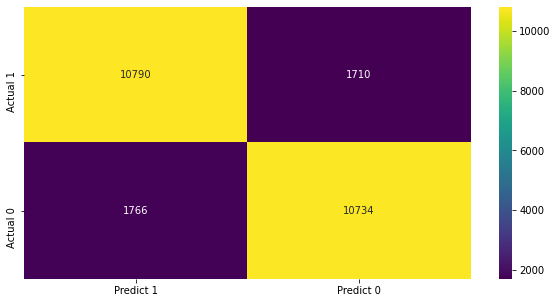

In [42]:
y_predict = model_seq.predict(x_test)

import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_predict.round(), labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 1', 'Actual 0']],
                     columns = [i for i in ['Predict 1', 'Predict 0']])

colormap = plt.cm.viridis  # Color range to be used
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = colormap, linecolor = 'red' );

- The True positive (TP) value is 10,543, it means out of 25,000 feedbacks, we predicted 10543 feedbacks are positive sentiments and they are actually turned to be positive.
- The true negative (TN) value is 10,976, it means out of 25,000 sentiment feedbacks, we predicted 10,976 feedbacks are negative and they all turned out to be negative.
- The false positive (FP) value is 1524 out of 25,000 sentiments, it  means we predicted them as positive feedback but actually they turned out to be negative feedback.
- The False Negative (FN) value is 1957 out of 25,000 feedbacks, it means we predicted them as negative feedbacks but they turned out to be positive feedback.

In [43]:
print(metrics.classification_report(y_test, y_predict.round()))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



- Not the f1-score value is 86% for both of the positive and negative sentiment feedbacks. (f1 score is the harmonic mean of model's precission and recall)
- The model score is also 86%.
- The model seems to be good but a little tuning is required to go beyond the 90% accuracy score.  

-- let's check the training and validation accuracy to measure the performance of the model.

Epoch 1/5
40/40 [==============================] - 18s 457ms/step - loss: 0.0864 - accuracy: 0.9700 - val_loss: 0.1901 - val_accuracy: 0.9164
Epoch 2/5
40/40 [==============================] - 18s 443ms/step - loss: 0.0911 - accuracy: 0.9680 - val_loss: 0.0789 - val_accuracy: 0.9730
Epoch 3/5
40/40 [==============================] - 18s 446ms/step - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.0850 - val_accuracy: 0.9708
Epoch 4/5
40/40 [==============================] - 18s 444ms/step - loss: 0.0189 - accuracy: 0.9961 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 5/5
40/40 [==============================] - 18s 443ms/step - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.1673 - val_accuracy: 0.9580


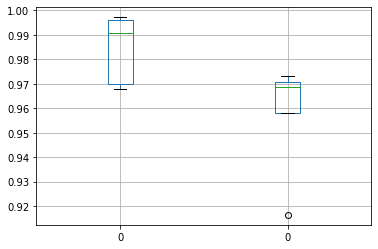

In [44]:
# Running the model with 5 epochs and 500 batch size with a train and validation split of 80% and 20% respectively.
history1 = model_seq.fit(x_train, y_train, batch_size = 500, epochs = 5,validation_split = 0.2, verbose = 1)

# Assigning the training accuracy to a variable as a DataFrame
ta= pd.DataFrame(history1.history['accuracy'])

# Assigning the validation accuracy to a variable as a DataFrame
va = pd.DataFrame(history1.history['val_accuracy'])

# Concatenating both the accuracy and assignin the score to a variable as a DataFrame
ta_va = pd.concat([ta, va], axis = 1)

# Creating a Box Plot to check the difference between two accuracies.
ta_va.boxplot()

- From the above box plots, it can be observed that there is a small difference between accuracies of training and validation set. 
- The training accuracy came around 99.8% with a median of 99.5% where as validation accuracy came around 94.8% with almost same median value.
- A slight differenec in accuracies can be accomadated by increasing number of neurons in the LSTM layers and can also be overcomed by adding some more epochs.

- Now let's visualize the accuracies of each epochs graphically.

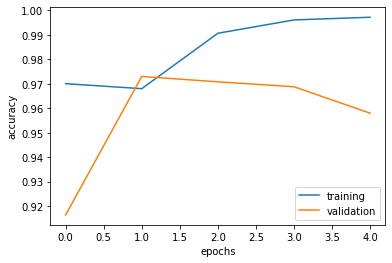

In [45]:
# Visualizing Training and Validation accuracy across the epochs
plt.plot(ta, label = 'training')
plt.plot(va, label = 'validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = "lower right");

- With respect to epochs, the training accuracy seems to be increasing initially but becomes stable after 2 epochs and tries to remain above 99%.
- However, the validation accuracy seems to be falling down from 99% to 96% with respect to each epochs. This may be due to number of neurons present in the layers.
- By hypertuning the parameters, we can make validation accyracy stable and can also bring this one close to the training accuracy.

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

Let's make it more simpler and understandable.....

In [46]:
from keras.models import Model
layer_outputs = []
for i in range(1, len(model_seq.layers)):
    model_temp = Model(model_seq.layers[0].input, model_seq.layers[i].output)
    output_temp = model_temp.predict(x_test)[5]
    layer_outputs.append(output_temp)
    print(i+1, '-Layer Output\n')
    print(output_temp, '\n', 'Size:', output_temp.shape, "\n")

2 -Layer Output

[-0.14466338 -0.13103941  0.02881297 -0.01723955 -0.18364911  0.03636101
 -0.0794455   0.11615819  0.05335248 -0.04800325  0.05221564 -0.14761288
  0.09493496  0.13991147 -0.11863828 -0.08705147  0.14850599  0.13952492
  0.01134994  0.07976381  0.21782477  0.00077859 -0.13166803  0.38922
 -0.10030391  0.06181117 -0.08821342  0.01145477 -0.08212183 -0.06348813
  0.13126472  0.14711837  0.05683508  0.11455517 -0.12242979 -0.10675788
  0.00321797 -0.236755    0.09138696 -0.08604989  0.06546013 -0.08382159
 -0.05288065 -0.15182197  0.03179544 -0.00804861 -0.02533646 -0.21650852
 -0.06853273 -0.00151062 -0.08437602  0.01558676  0.16393591 -0.13319016
 -0.1367248   0.17785299 -0.0202585  -0.11464594 -0.00127812  0.04673256
  0.15422899 -0.02897153 -0.02831157  0.1267308  -0.0702364  -0.18415855
  0.09886642  0.24455915  0.07649149  0.21468906  0.07483675  0.13516103
  0.09704091  0.0604766   0.14933474  0.13811181  0.01378643  0.06872308
  0.1540189   0.06552739  0.09271725 

- 0.99147 signifies that 6th number test feedback/point predicted by the model accurately matches the actual feedback given by the user.
- The feedback seems to be Positive as per the model.


- In this way we can perdict the sentiment of the users and segregate their reviews to enhance the business as per their chioce.    

In [47]:
print(' '.join(id_to_word[id] for id in x_test[5] ))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

- If we see the review for the movie, it seems to be totally positive and the viewer wants the disney to increase it's popularity and also wants that modern age children should watch it.

- It means, the model we have built is solid enough to distinguish the sentiments and predict it correctly.

The End
